Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_110.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_111.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_113.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_114.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_115.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_116.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_12.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_120.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images\resized_122.jpg
Saved: C:\Users\Resh

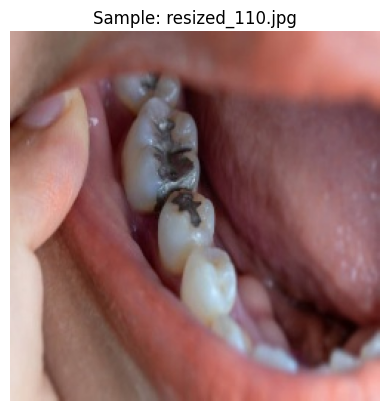

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

# Define original image directory
image_dir = r'C:\Users\Reshmi\Capstone-Project\milestone3\Raw_images'

# Define separate output directory (NOT inside image_dir)
save_dir = r'C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\resized_images'
os.makedirs(save_dir, exist_ok=True)  # Create output folder if it doesn't exist

# Define new size for resizing
new_size = (250, 250)

# Get up to 1000 .jpg files from image_dir
image_filenames = [
    fname for fname in os.listdir(image_dir)
    if fname.lower().endswith(".jpg")
][:1000]

# Resize and save images
for fname in image_filenames:
    image_path = os.path.join(image_dir, fname)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Failed to load {fname}")
        continue

    resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)
    save_path = os.path.join(save_dir, f"resized_{fname}")
    cv2.imwrite(save_path, resized_img)
    print(f"Saved: {save_path}")

print("All images resized and saved in a separate folder!")

# --- Display the first successfully resized image ---

# Find the first resized image in the save directory
resized_files = [f for f in os.listdir(save_dir) if f.lower().endswith(".jpg")]
if resized_files:
    first_image_path = os.path.join(save_dir, resized_files[0])
    test_image = cv2.imread(first_image_path)
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    plt.imshow(test_image_rgb)
    plt.axis("off")
    plt.title(f"Sample: {resized_files[0]}")
    plt.show()
else:
    print("No resized images found to display.")


In [ ]:
mport os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

# Set dataset path
image_dir = r"C:\Users\Reshmi\Capstone-Project\milestone2\Capstone-Project\milestone2\Reshmi_image_stratification\Subgrouped_images"
data = []

for folder_name in os.listdir(image_dir):
    folder_path = os.path.join(image_dir, folder_name)
    if os.path.isdir(folder_path):
        try:
            region, label = folder_name.split('_')
        except ValueError:
            print(f"Skipping unexpected folder format: {folder_name}")
            continue

        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append({
                    'filename': os.path.join(folder_name, filename),  # relative path
                    'region': region.lower(),
                    'class': label.lower()
                })

# Create DataFrame
df = pd.DataFrame(data)

if df.empty:
    print("No images found")
else:
    df.to_csv("dental_images.csv", index=False)
    print(f"CSV created with {len(df)} rows: dental_images.csv")
    print(df.head())

# Example CSV structure: filename, region, class
# region: 'posterior' or 'anterior'
# class: 'caries' or 'non-caries'

# Load metadata file
df = pd.read_csv('dental_images.csv')

# Create a stratification key
df['stratify_col'] = df['region'] + '_' + df['class']

# Perform stratified split (80% train, 20% test)
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['stratify_col'],
    random_state=42
)

# reset indices
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Save the splits
train_df.to_csv('train_split.csv', index=False)
test_df.to_csv('test_split.csv', index=False)

print("Train split:", train_df['stratify_col'].value_counts())
print("Test split:", test_df['stratify_col'].value_counts())

# Load the splits
train_df = pd.read_csv("train_split.csv")
test_df = pd.read_csv("test_split.csv")

# Original image location
base_folder = r"C:\Users\Reshmi\Capstone-Project\milestone2\Capstone-Project\milestone2\Reshmi_image_stratification\Subgrouped_images"

# Output directory
output_dir = "output_images"

def copy_images(df, split_type):
    for _, row in df.iterrows():
        subfolder = f"{row['region']}_{row['class']}"
        base_path = os.path.join(base_folder, row['filename'])
        dest_path = os.path.join(output_dir, split_type, subfolder)
        os.makedirs(dest_path, exist_ok=True)
        try:
            shutil.copy(base_path, dest_path)
        except FileNotFoundError:
            print(f"File not found: {base_path}")

# Copy train and test images
copy_images(train_df, "train")
copy_images(test_df, "test")

